In [1]:
# 导入包
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [17]:
# 导入MNIST数据集，该数据集Keras自带
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [18]:
#  标准化数据
x_train = x_train.reshape(x_train.shape[0], -1) / 255.  # 原数据是0-255不适合输入模型训练，标准化为0-1
x_valid = x_valid.reshape(x_valid.shape[0], -1) / 255.
# 标签one-hot编码，使用keras中工具
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_valid = np_utils.to_categorical(y_valid, num_classes=10)

In [19]:
# 模型构建
model = Sequential([
    Dense(32, input_dim=28*28),
    Activation('relu'),  # 使用relu激活
    Dense(10),
    Activation('softmax'),  # 使用softmax输出每个类别的概率
])

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',  # 分类多用交叉熵
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


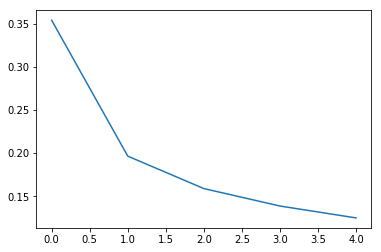

In [21]:
# 训练
history = model.fit(x_train, y_train, epochs=5, verbose=False)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(5), history.history['loss'])
plt.show()


10000/10000 [==============================] - 0s 32us/step
test loss:  0.1279472703576088
test accuracy:  0.965
[7 2 1 0 4 1 4 9 6 9]


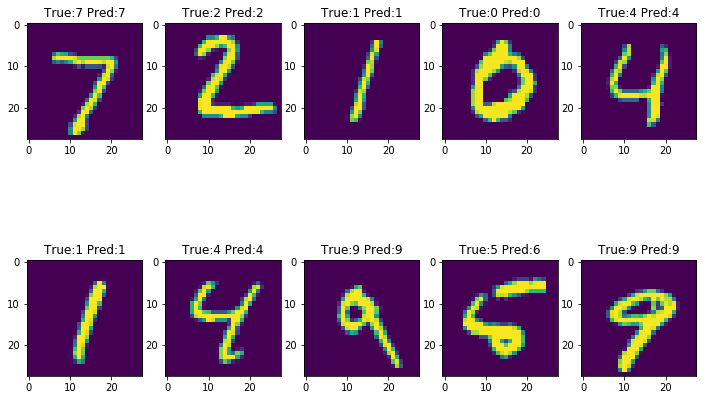

In [28]:
loss, accuracy = model.evaluate(x_valid, y_valid)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

pred = np.argmax(model.predict(x_valid[:10]), axis=1)
print(pred)
# 挑选部分输出
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_valid[i].reshape(28, 28))
    plt.title("True:{} Pred:{}".format(np.argmax(y_valid[i]), pred[i]))
plt.show()